In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def fill_na_proportionally(dataframe, column_name):

    choices = dataframe[column_name].dropna().unique()
    proportions = dataframe[column_name].value_counts(normalize=True).values

    return np.random.choice(choices, 1, p=proportions)[0]

def show_dispersion(x, y):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']

    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            x[y==l]['LoanAmount'],
            x[y==l]['ApplicantIncome'],
            c=c, label=l, marker=m
        )

    plt.title('Dispersion')
    plt.legend(loc='upper right')
    plt.show()

In [6]:
dados = pd.read_csv("loan_data.csv")

dados = dados.drop("Loan_ID", axis=1).copy()

<Axes: xlabel='Loan_Status'>

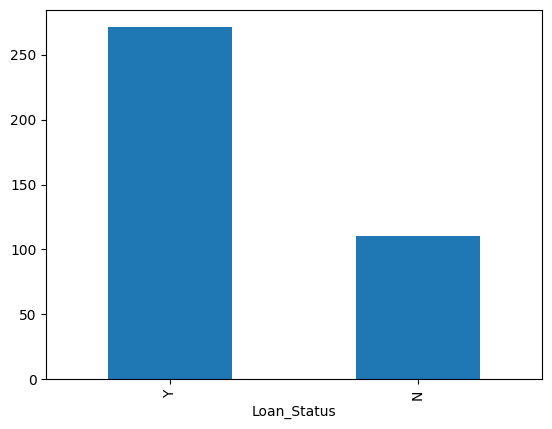

In [7]:
dados['Loan_Status'].value_counts().plot(kind='bar')

In [8]:
colunas_com_null = dados.columns[dados.isna().any()].tolist()

for name in colunas_com_null:
   dados[name] = dados[name].apply(lambda x: fill_na_proportionally(dados, name) if pd.isna(x) else x)


In [9]:
yes_no_dicionary = {'Y': 1, 'N': 0, 'Yes': 1, 'No': 0}

dados[['Married', 'Self_Employed', 'Loan_Status']] = dados[['Married', 'Self_Employed', 'Loan_Status']].replace(yes_no_dicionary)

In [10]:
dummies = pd.get_dummies(dados.drop(['Self_Employed', 'ApplicantIncome', 'Married', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status'], axis=1), dtype=int)

dados_numericos = dados[['Self_Employed', 'ApplicantIncome', 'Married', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']].copy()

dados_tratados = pd.concat([dummies, dados_numericos], axis=1)

In [11]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_antes = dados_tratados.drop('Loan_Status', axis=1)
Y_antes = dados_tratados['Loan_Status']

X_depois, Y_depois = oversample.fit_resample(X_antes, Y_antes)

dados_final = pd.concat([X_depois, Y_depois], axis=1)

<Axes: xlabel='Loan_Status'>

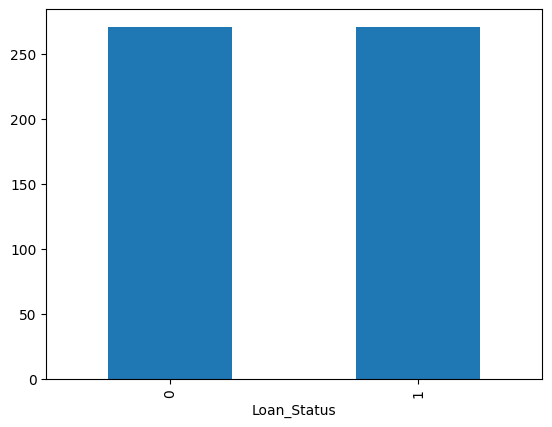

In [12]:
dados_final['Loan_Status'].value_counts().plot(kind='bar')

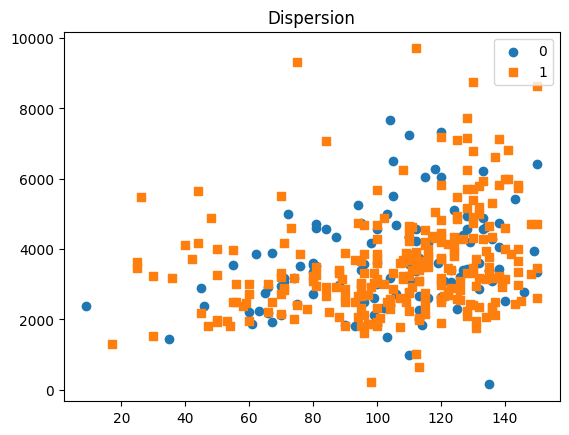

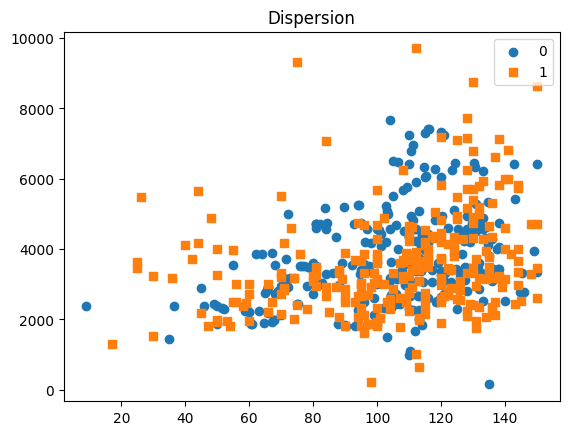

In [13]:
show_dispersion(X_antes, Y_antes)

show_dispersion(X_depois, Y_depois)

In [14]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()

X_normalizado = scaller.fit_transform(X_depois)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, Y_depois, test_size=0.3, random_state=123)

In [16]:
bnb = BernoulliNB(binarize=np.abs(np.median(X_treino)))
bnb.fit(X_treino, y_treino)
predicao_bnb = bnb.predict(X_teste)

accuracy_score(y_teste, predicao_bnb), precision_score(y_teste, predicao_bnb), recall_score(y_teste, predicao_bnb)

(0.8404907975460123, 0.8172043010752689, 0.8941176470588236)

In [17]:
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3)
knn.fit(X_treino, y_treino)
predicao_knn = knn.predict(X_teste)

accuracy_score(y_teste, predicao_knn), precision_score(y_teste, predicao_knn), recall_score(y_teste, predicao_knn)

(0.8711656441717791, 0.8404255319148937, 0.9294117647058824)

In [18]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)
dtc.fit(X_treino, y_treino)
predicao_dtc = dtc.predict(X_teste)

accuracy_score(y_teste, predicao_dtc), precision_score(y_teste, predicao_dtc), recall_score(y_teste, predicao_dtc)

(0.8220858895705522, 0.8333333333333334, 0.8235294117647058)